In [63]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.optimize as soc 
from scipy import constants as const
from lmfit import models
from lmfit import Model
from scipy.signal import find_peaks

In [64]:
#import Oszilloskop daten 
puls1 = np.array(np.genfromtxt("tab/oszilloskop/puls1.csv", delimiter = ",",skip_header=12))
puls2 = np.array(np.genfromtxt("tab/oszilloskop/puls2.csv", delimiter = ",",skip_header=12))
sg1c1 =  np.array(np.genfromtxt("tab/oszilloskop/signalc1.csv", delimiter = ",",skip_header=12))
sg1c3 =  np.array(np.genfromtxt("tab/oszilloskop/s2c3.csv", delimiter = ",",skip_header=12))
sg2c1 =  np.array(np.genfromtxt("tab/oszilloskop/sg3c1.csv", delimiter = ",",skip_header=12))
sg2c3 =  np.array(np.genfromtxt("tab/oszilloskop/sg4c3.csv", delimiter = ",",skip_header=12))

In [65]:
#import first tabel
tlam= np.array(np.genfromtxt("tab/messreihe1.txt", delimiter='&'))
absorption = np.array(np.genfromtxt("tab/absorption.txt", delimiter='&'))
lpow1 = np.array(np.genfromtxt("tab/lpow1.txt", delimiter='&'))
lpow2 = np.array(np.genfromtxt("tab/lpow2.txt", delimiter='&'))
secondp1 = np.array(np.genfromtxt("tab/2ndwave-power.txt", delimiter='&'))
ndpower = np.array(np.genfromtxt("tab/ndyagpower.txt", delimiter='&'))

In [66]:
def linear(x:np.array,m:float,b:float):
    return m*x+b

0.9998407299101856 {'m': 0.31431439325383087, 'b': 797.9283071779096}
[0.00392682 0.1017353 ]


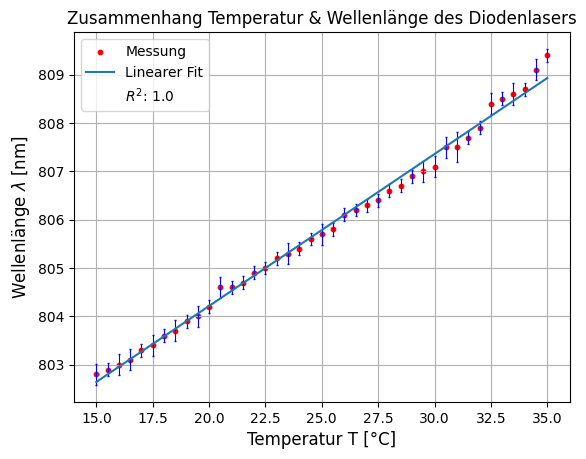

In [132]:
plt.scatter(tlam[:,0],tlam[:,1],s=10,c="red",label="Messung")
plt.errorbar(tlam[:,0],tlam[:,1],yerr=np.sqrt(tlam[:,2]**2+(0.1/2*np.sqrt(3))**2),linestyle="",capsize=1,c="blue",elinewidth=0.8)

lmodel = Model(linear)
lparam0 = lmodel.make_params(m = 0.3,b = 800)
lresult0 = lmodel.fit(tlam[:,1],params=lparam0,x = tlam[:,0],weights = tlam[:,2])
plt.plot(tlam[:,0], lresult0.best_fit, '-', label='Linearer Fit')
plt.plot([], [], ' ', label=r"$R^2$: "+str(np.round(lresult0.rsquared,2)))
print(lresult0.rsquared,lresult0.best_values)

plt.legend(loc=0)
plt.ylabel(r"Wellenlänge $\lambda$ [nm]",fontsize=12)
plt.xlabel(r"Temperatur T [°C]",fontsize=12)
plt.title("Zusammenhang Temperatur & Wellenlänge des Diodenlasers",fontsize=12)
plt.grid(True)
plt.savefig("Plots/Temperatur_Wellenlänge_Diode.pdf")
print(np.sqrt(np.diag(lresult0.covar)))

xerr: 0.16536776795029187 , yerr:  0.5 $\lambda$:  808.3635450339368


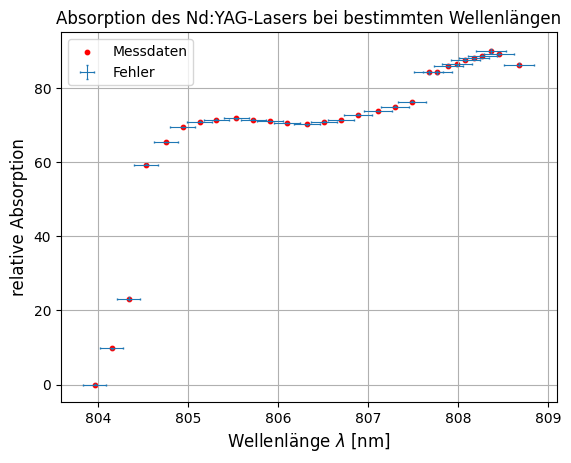

In [94]:
covvalue = np.sqrt(np.diag(lresult0.covar))
xerr0 = np.sqrt((covvalue[0]*absorption[:,0])**2+(covvalue[1])**2)

plt.errorbar((lresult0.best_values["m"]*absorption[:,0]+lresult0.best_values["b"]),100-(absorption[:,2]/85.6)*100,yerr=absorption[:,3],xerr=xerr0,linestyle="",capsize=1,label="Fehler",elinewidth=0.8)
plt.scatter((lresult0.best_values["m"]*absorption[:,0]+lresult0.best_values["b"]),100-(absorption[:,2]/85.6)*100,s=10,c="red",label="Messdaten")

maxindex = np.argmax(100-(absorption[:,2]/85.6)*100)

max_xerr = np.sqrt((covvalue[0]*absorption[maxindex,0])**2+(covvalue[1])**2)
max_yerr= absorption[maxindex,3]
max_value = (lresult0.best_values["m"]*absorption[maxindex,0]+lresult0.best_values["b"])

print("xerr:",max_xerr,", yerr: ", max_yerr, r"$\lambda$: ",max_value)

#maxabsorbance = 0.32*(np.max(100-(absorption[:,2]/85.6)*100))+797.87
#plt.plot(tlam[:,0],popt[0]*tlam[:,0]+popt[1],color="orange",label="Linearer Fit: "+str(round(popt[0],2))+"* T + "+str(round(popt[1],5)))
plt.grid(True)
#plt.axis([807.5,809,82,92])
plt.legend(loc=0)
plt.xlabel(r"Wellenlänge $\lambda$ [nm]",fontsize=12)
plt.ylabel(r"relative Absorption",fontsize=12)
plt.title("Absorption des Nd:YAG-Lasers bei bestimmten Wellenlängen",fontsize=12)
plt.savefig("Plots/absorptionndyag.pdf")
#plt.savefig("Plots/absorptionndyaglimited.pdf")

0.38716917260292205 0.027756803835184363
1.0913728426752038 0.03168784103539451
26:  242.74954437405603 40.24163525988244
32:  230.42766788437575 14.896423631185215


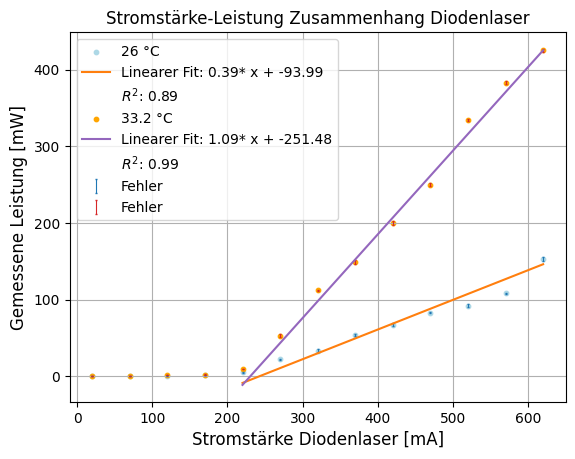

In [206]:
lmodel = Model(linear)
lparam = lmodel.make_params(m = 1,b = 1)
lresult1 = lmodel.fit(lpow1[0:9,1]*10,params=lparam,x = lpow1[0:9,0],weights = lpow1[0:9,2]*10)
lresult2 = lmodel.fit(lpow2[4:13,1]*10,params=lparam,x = lpow2[4:13,0],weights = lpow2[4:13,2]*10)

#26 Grad
plt.errorbar(lpow1[:,0],lpow1[:,1]*10,yerr=lpow1[:,2]*10,linestyle="",capsize=1,elinewidth=0.8,label="Fehler")
plt.scatter(lpow1[:,0],lpow1[:,1]*10,s=10,label="26 °C",c="lightblue")

plt.plot(lpow1[0:9,0], lresult1.best_fit, '-', label='Linearer Fit: '+str(np.round(lresult1.best_values["m"],2))+"* x + "+str(np.round(lresult1.best_values["b"],2)))
plt.plot([], [], ' ', label=r"$R^2$: "+str(np.round(lresult1.rsquared,2)))

#32 Grad
plt.errorbar(lpow2[:,0],lpow2[:,1]*10,yerr=lpow2[:,2]*10,linestyle="",capsize=1,elinewidth=0.8,label="Fehler")
plt.scatter(lpow2[:,0],lpow2[:,1]*10,s=10,label="33.2 °C",c="orange")

plt.plot(lpow2[4:13,0], lresult2.best_fit, '-', label='Linearer Fit: '+str(np.round(lresult2.best_values["m"],2))+"* x + "+str(np.round(lresult2.best_values["b"],2)))
plt.plot([], [], ' ', label=r"$R^2$: "+str(np.round(lresult2.rsquared,2)))

plt.xlabel("Stromstärke Diodenlaser [mA]",fontsize=12)
plt.ylabel("Gemessene Leistung [mW]",fontsize=12)
plt.title("Stromstärke-Leistung Zusammenhang Diodenlaser",fontsize=12)
plt.legend()
plt.grid(True)
plt.savefig("Plots/PTup.pdf")


print(lresult1.best_values['m'], np.sqrt(np.diag(lresult1.covar))[0])
print(lresult2.best_values['m'], np.sqrt(np.diag(lresult2.covar))[0])

print("26: ", -lresult1.best_values['b']/lresult1.best_values['m'], np.sqrt((np.sqrt(np.diag(lresult1.covar))[0]*(-lresult1.best_values['b']/lresult1.best_values['m']**2))**2+(np.sqrt(np.diag(lresult1.covar))[1]*1/lresult1.best_values['m'])**2))
print("32: ", -lresult2.best_values['b']/lresult2.best_values['m'],np.sqrt((np.sqrt(np.diag(lresult2.covar))[0]*(-lresult2.best_values['b']/lresult2.best_values['m']**2))**2+(np.sqrt(np.diag(lresult2.covar))[1]*1/lresult2.best_values['m'])**2))

xerr: 0.16629807816381376 , yerr:  0.3 $\lambda$:  808.4578393519129


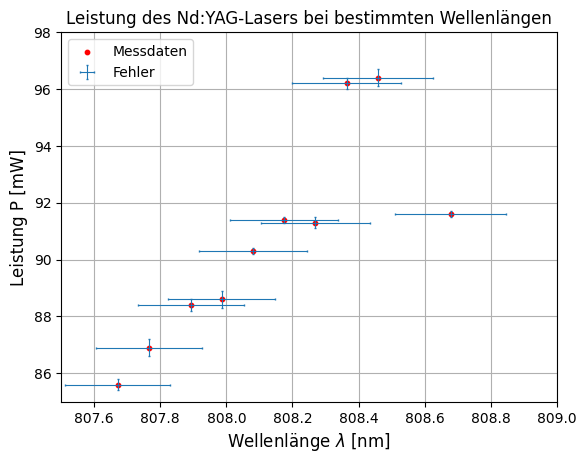

In [92]:
plt.errorbar((lresult0.best_values["m"]*secondp1[:,0]+lresult0.best_values["b"]),secondp1[:,2],xerr=xerr0,yerr=secondp1[:,3],linestyle="",capsize=1,elinewidth=0.8,label="Fehler")
plt.scatter((lresult0.best_values["m"]*secondp1[:,0]+lresult0.best_values["b"]),secondp1[:,2],s=10,c="red",label="Messdaten")
#maxabsorbance = 0.32*(np.max(100-(absorption[:,2]/85.6)*100))+797.87
#plt.plot(tlam[:,0],popt[0]*tlam[:,0]+popt[1],color="orange",label="Linearer Fit: "+str(round(popt[0],2))+"* T + "+str(round(popt[1],5)))


maxindex1 = np.argmax(secondp1[:,2])

max_xerr1 = np.sqrt((covvalue[0]*secondp1[maxindex1,0])**2+(covvalue[1])**2)
max_yerr1= secondp1[maxindex1,3]
max_value1 = (lresult0.best_values["m"]*secondp1[maxindex1,0]+lresult0.best_values["b"])

print("xerr:",max_xerr1,", yerr: ", max_yerr1, r"$\lambda$: ",max_value1)


plt.grid(True)
plt.axis([807.5,809,85,98])
plt.legend(loc=0)
plt.xlabel(r"Wellenlänge $\lambda$ [nm]",fontsize=12)
plt.ylabel(r"Leistung P [mW]",fontsize=12)
plt.title("Leistung des Nd:YAG-Lasers bei bestimmten Wellenlängen",fontsize=12)
plt.savefig("Plots/wave_powerlimited.pdf")
#plt.savefig("Plots/wave_power.pdf")

0.9999157588264632 {'m': 0.2855752979413773, 'b': -76.96219212706221}


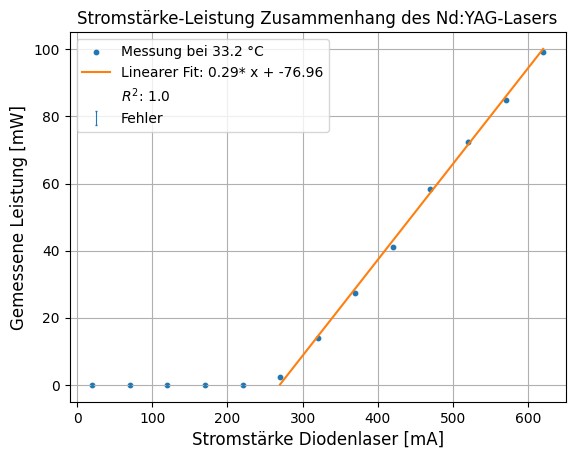

In [133]:
plt.errorbar(ndpower[:,0],ndpower[:,1],yerr=ndpower[:,2],linestyle="",capsize=1,elinewidth=0.8,label="Fehler")
plt.scatter(ndpower[:,0],ndpower[:,1],s=10,label="Messung bei 33.2 °C")

lmodel3 = Model(linear)
lparam3 = lmodel.make_params(m = 1,b = 1)
lresult3 = lmodel.fit(ndpower[5:13,1],params=lparam3,x = ndpower[5:13,0],weights = ndpower[5:13,2])

plt.plot(ndpower[5:13,0], lresult3.best_fit, '-'
         , label='Linearer Fit: '+str(np.round(lresult3.best_values["m"],2))
         +"* x + "+str(np.round(lresult3.best_values["b"],2)))
plt.plot([], [], ' ', label=r"$R^2$: "+str(np.round(lresult3.rsquared,2)))
print(lresult3.rsquared,lresult3.best_values)



#popt3,cov3 = soc.curve_fit(linear,ndpower[5:13,0],ndpower[5:13,1],sigma=ndpower[5:13,2])
#plt.plot(ndpower[5:13,0],linear(ndpower[5:13,0],*popt3))
plt.xlabel("Stromstärke Diodenlaser [mA]",fontsize=12)
plt.ylabel("Gemessene Leistung [mW]",fontsize=12)
plt.title("Stromstärke-Leistung Zusammenhang des Nd:YAG-Lasers",fontsize=12)
plt.legend()
plt.grid(True)
plt.savefig("Plots/powerupndy.pdf")

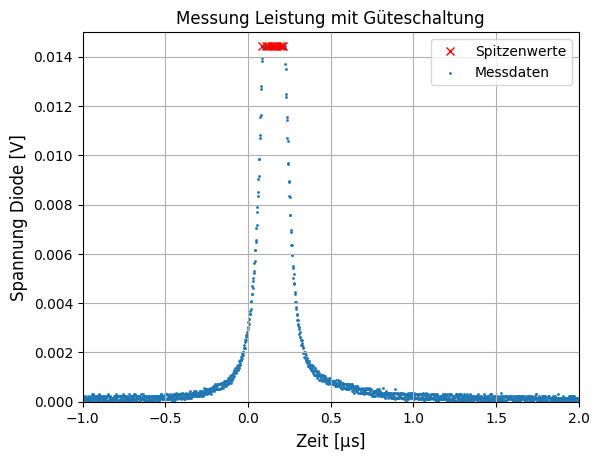

In [112]:
#plt.figure(figsize=(10,6))
peaks, _ = find_peaks(puls1[::,1],height=0.012,plateau_size=2)
plt.plot(puls1[peaks,0]*10**6, puls1[peaks,1], "x",c="red",label="Spitzenwerte")


plt.scatter(puls1[::,0]*10**6,puls1[::,1],label="Messdaten",s=1)
plt.axis([-1,2,0,0.015])
plt.xlabel(r"Zeit $[\mathrm{\mu s}]$",fontsize=12)
plt.ylabel("Spannung Diode [V]",fontsize=12)
plt.title("Messung Leistung mit Güteschaltung",fontsize=12)
plt.legend(loc=1)
plt.grid(True)
plt.savefig("Plots/osci1_peak.pdf")
#plt.savefig("Plots/osci1.pdf")
plt.show()

In [73]:
print(puls1[peaks,0]*10**6)

[-9.49954e+02 -9.49942e+02 -9.49930e+02 -9.49914e+02 -9.49906e+02
 -9.49898e+02 -9.49890e+02 -9.49874e+02 -9.49866e+02 -9.49858e+02
 -9.49848e+02 -9.49834e+02 -9.49826e+02 -7.26086e+02 -7.26074e+02
 -7.26050e+02 -7.26034e+02 -7.26010e+02 -7.25996e+02 -7.25970e+02
 -7.25956e+02 -7.25934e+02 -7.25926e+02 -7.25916e+02 -4.74612e+02
 -4.74590e+02 -4.74582e+02 -4.74570e+02 -4.74550e+02 -4.74532e+02
 -4.74510e+02 -4.74494e+02 -4.74482e+02 -2.51098e+02 -2.51090e+02
 -2.51074e+02 -2.51062e+02 -2.51050e+02 -2.51034e+02 -2.51026e+02
 -2.51018e+02 -2.51010e+02 -2.50994e+02 -2.50986e+02 -2.50978e+02
 -2.50968e+02 -2.50954e+02 -2.50946e+02 -2.50938e+02 -2.50928e+02
 -2.50920e+02 -2.50914e+02  8.60000e-02  1.10000e-01  1.22000e-01
  1.36000e-01  1.50000e-01  1.62000e-01  1.74000e-01  1.90000e-01
  2.02000e-01  2.14000e-01  2.23246e+02  2.23254e+02  2.23262e+02
  2.23272e+02  2.23286e+02  2.23294e+02  2.23302e+02  2.23312e+02
  2.23320e+02  2.23326e+02  2.23334e+02  2.23352e+02  2.23360e+02
  2.23366e

In [74]:
p1 = [-9.49954e+02, -9.49942e+02, -9.49930e+02, -9.49914e+02, -9.49906e+02,-9.49898e+02, -9.49890e+02, -9.49874e+02, -9.49866e+02, -9.49858e+02, -9.49848e+02, -9.49834e+02, -9.49826e+02]
p2 = [-7.26086e+02, -7.26074e+02,-7.26050e+02, -7.26034e+02, -7.26010e+02, -7.25996e+02, -7.25970e+02, -7.25956e+02, -7.25934e+02, -7.25926e+02, -7.25916e+02]
p3 = [-4.74612e+02, -4.74590e+02, -4.74582e+02, -4.74570e+02, -4.74550e+02, -4.74532e+02, -4.74510e+02, -4.74494e+02, -4.74482e+02]
p4 = [-2.51098e+02, -2.51090e+02, -2.51074e+02, -2.51062e+02, -2.51050e+02, -2.51034e+02, -2.51026e+02, -2.51018e+02, -2.51010e+02, -2.50994e+02, -2.50986e+02, -2.50978e+02, -2.50968e+02, -2.50954e+02, -2.50946e+02, -2.50938e+02, -2.50928e+02, -2.50920e+02, -2.50914e+02]
p5 = [8.60000e-02,  1.10000e-01,  1.22000e-01,  1.36000e-01,  1.50000e-01 , 1.62000e-01 , 1.74000e-01 , 1.90000e-01,  2.02000e-01,  2.14000e-01]
p6 = [2.23246e+02 , 2.23254e+02 , 2.23262e+02,  2.23272e+02,  2.23286e+02 , 2.23294e+02 , 2.23302e+02 , 2.23312e+02,  2.23320e+02 , 2.23326e+02 , 2.23334e+02,  2.23352e+02 , 2.23360e+02,  2.23366e+02 , 2.23374e+02,  2.23392e+02 , 2.23414e+02]
p7 = [4.75130e+02,  4.75150e+02 , 4.75158e+02 , 4.75166e+02 , 4.75190e+02 , 4.75202e+02,  4.75230e+02 , 4.75240e+02,  4.75250e+02]
p8 = [6.99446e+02,  6.99458e+02,  6.99466e+02 , 6.99478e+02,  6.99498e+02,  6.99510e+02,  6.99538e+02,  6.99548e+02 , 6.99558e+02 , 6.99588e+02  ,6.99598e+02 , 6.99628e+02]
p9 = [9.51418e+02 , 9.51426e+02,  9.51438e+02 , 9.51458e+02,  9.51466e+02,  9.51478e+02, 9.51498e+02, 9.51516e+02 , 9.51538e+02, 9.51546e+02]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


1 & 223.89 & 0.3 \
2 & 251.45 & 0.3 \
3 & 223.55 & 0.31 \
4 & 251.15 & 0.31 \
5 & 223.17 & 0.3 \
6 & 251.87 & 0.29 \
7 & 224.34 & 0.3 \
8 & 251.95 & 0.31 \


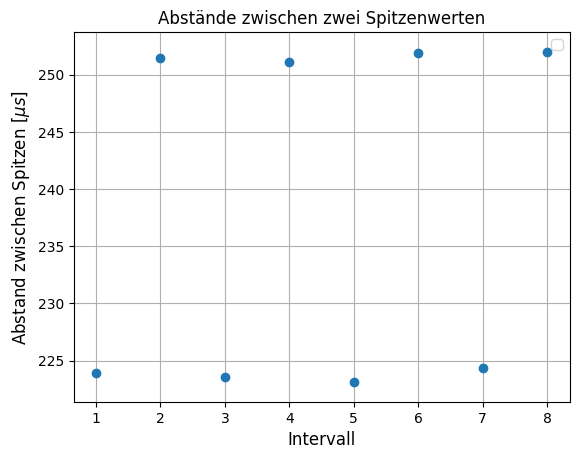

mittlere Distanaz:  237.67073653846157 
 max. abstand. zw. dista.: 28.785103921568748 
 mittlere error:  0.30249999999999133
Distanz liste:  
 [223.89205594405598, 251.4487474747475, 223.54752046783628, 251.15396842105264, 223.16692941176473, 251.86913725490197, 224.33549999999997, 251.95203333333347]

0.00023767073653846156 2.9390000000000015e-05


In [190]:
ps = [p1,p2,p3,p4,p5,p6,p7,p8,p9]
peakfinal = []
peakerror = []
for i in ps:
    peakfinal.append(np.mean(i))
    peakerror.append(np.max(i)-np.min(i))

#for i in range(len(peakfinal)):
#    print(np.round(peakfinal[i],2),"&",np.round(peakerror[i],2),"\\")

distance = []
distance_error = []
for k in range(0,len(peakfinal)-1):
    distance.append(peakfinal[k+1]-peakfinal[k])
    distance_error.append(peakerror[k+1]+peakerror[k])

for i in range(len(distance)):
    print(str(i+1),"&",np.round(distance[i],2),"&",np.round(distance_error[i],2),"\\")

#plt.scatter(range(1,len(distance)+1),distance,label="Werte")
plt.errorbar(range(1,len(distance)+1),distance,yerr=distance_error,fmt="o")
plt.xlabel(r"Intervall",fontsize=12)
plt.ylabel(r"Abstand zwischen Spitzen [$\mu s$]",fontsize=12)
plt.title("Abstände zwischen zwei Spitzenwerten",fontsize=12)
plt.legend(loc=0)
plt.grid(True)
plt.savefig("Plots/distances.pdf")
plt.show()

print("mittlere Distanaz: ", np.mean(distance),"\n", 
      "max. abstand. zw. dista.:",np.max(distance)-np.min(distance),"\n",
      "mittlere error: ", np.mean(distance_error))
print("Distanz liste: ", "\n", distance)
#print(peakfinal,peakerror)

print()

meandistance = (np.mean(distance)*10**(-6))
meandistance_error = ((251.95+0.31) - (223.17-0.3))*10**(-6)


print(meandistance,meandistance_error)

In [77]:
def gaussian(x: np.ndarray,a:float, mu: float, sigma: float,y0:float):
    return a*np.exp(-(x-mu)**2/(2*sigma**2))+y0

Reduziert chi: 1.861084298159666e-06 chiquadrat 0.004273049548574593
{'a': 0.05810645602975121, 'mu': 0.059193679977103716, 'sigma': 0.04756566184355842, 'y0': 0.003841190924133724} [8.67252581e-05 7.69214038e-05 9.12429720e-05 4.23951816e-05]


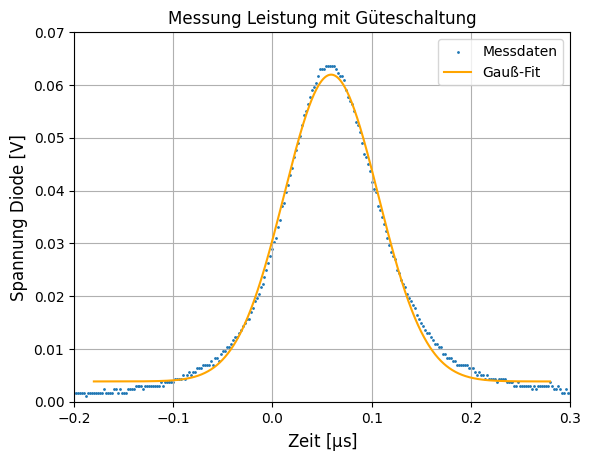

In [178]:
#plt.figure(figsize=(10,6))
#poptgauss1,covgauss1 = soc.curve_fit(gaussian,puls2[:,0]*10**6,puls2[:,1],method="lm")
#plt.plot(puls2[:,0]*10**6,gaussian(puls2[:,0]*10**6,*poptgauss1),label="Fit")
#stats.chisquare(puls2[:,0]*10**6,gaussian(puls2[:,0]*10**6,*poptgauss1),ddof=1)

plt.scatter(puls2[::10,0]*10**6,puls2[::10,1],label="Messdaten",s=1)

corner1 = 1600
corner2 = 3900

gmodel = Model(gaussian)

# create parameters with initial guesses:
params7 = gmodel.make_params(a=0.05, mu=0.06, sigma=0.08,y0=0.01)  
result7 = gmodel.fit(puls2[corner1:corner2,1], params7,x=puls2[corner1:corner2,0]*10**6)


plt.plot(puls2[corner1:corner2,0]*10**6, result7.best_fit, '-',label='Gauß-Fit',c="orange")
#plt.plot([],[],' ', label = r"Chi$^2$ =" + str(np.round(result.chisqr, 3)))
print("Reduziert chi:",result7.redchi,"chiquadrat",result7.chisqr)
print(result7.best_values,np.sqrt(np.diag(result7.covar)))

plt.axis([-2e-1,3e-1,0,0.07])
plt.xlabel(r"Zeit $[\mathrm{\mu s}]$",fontsize=12)
plt.ylabel("Spannung Diode [V]",fontsize=12)
plt.title("Messung Leistung mit Güteschaltung",fontsize=12)
plt.legend(loc=1)
plt.grid(True)
plt.savefig("Plots/osci2_fit.pdf")
#plt.savefig("Plots/osci2.pdf")

plt.show()

In [196]:
#P = mittlere Leistung
#R = Pulsrate/Frequenz
#T = Dauer eines Pulses

P = 2.79*10**(-3)
R = 1/meandistance
T = 2*result7.best_values["sigma"]*10**(-6)

print(P,R,T)


uP = 0.3*10**(-3)
uR = np.sqrt(((meandistance_error)*1/R**2)**2) #1/x -> -1/x^2*Fehler (GaußFortpflanzung)
uT = 2*np.sqrt(np.diag(result7.covar))[2]*10**(-6)

print(uR,uT)

pulspower = P/(R*T)
pulspower_error = np.sqrt((uP*1/(R*T))**2  +   (uR*(-P)/(T*R**2))**2   +   (uT*(-P)/(T**2*R))**2)

print("Pulspower:",pulspower,"Fehler:",pulspower_error)

0.00279 4207.50158208128 9.513132368711683e-08
1.660164069007937e-12 1.824859439254891e-10
Pulspower: 6.970378727444411 Fehler: 0.7496223467017064


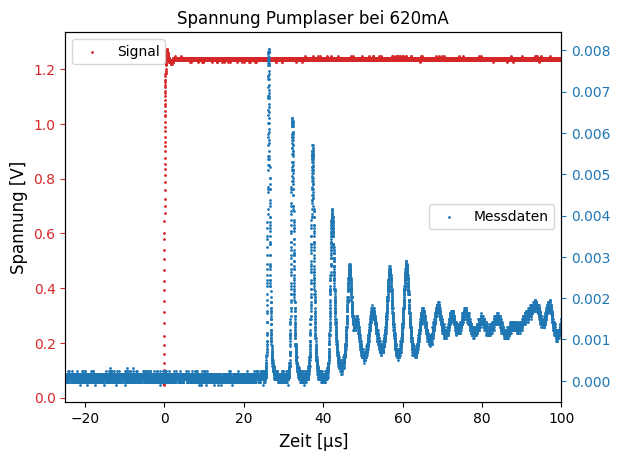

In [167]:
#plt.figure(figsize=(10,6))

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

ax1.scatter(sg1c1[::40,0]*10**6,sg1c1[::40,1],label="Signal",s=1,c="tab:red")
ax2.scatter(sg1c3[::40,0]*10**6,sg1c3[::40,1],label="Messdaten",s=1,c="tab:blue")
plt.xlim(-25,100)

ax1.tick_params(axis='y', colors='tab:red') 
ax2.tick_params(axis='y', colors='tab:blue') 

ax1.set_ylabel("Spannung [V]",fontsize=12)
#ax2.set_ylabel("Spannung [V]",fontsize=12,c="tab:blue")
plt.title("Spannung Pumplaser bei 620mA",fontsize=12)
ax1.legend(loc=2)
ax2.legend(loc=5)

ax1.set_xlabel(r"Zeit $[\mathrm{\mu s}]$",fontsize=12)

#plt.grid(True)
plt.savefig("Plots/s1all.pdf")
plt.show()

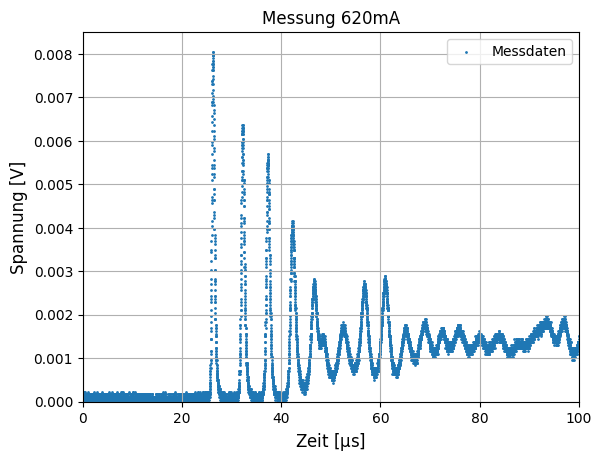

In [107]:
#plt.figure(figsize=(10,6))
plt.scatter(sg1c3[::40,0]*10**6,sg1c3[::40,1],label="Messdaten",s=1)
plt.axis([0,100,0,0.0085])
plt.xlabel(r"Zeit $[\mathrm{\mu s}]$",fontsize=12)
plt.ylabel("Spannung [V]",fontsize=12)
plt.title("Messung 620mA",fontsize=12)
plt.legend(loc=1)
plt.grid(True)
plt.savefig("Plots/s1c3.pdf")

plt.show()

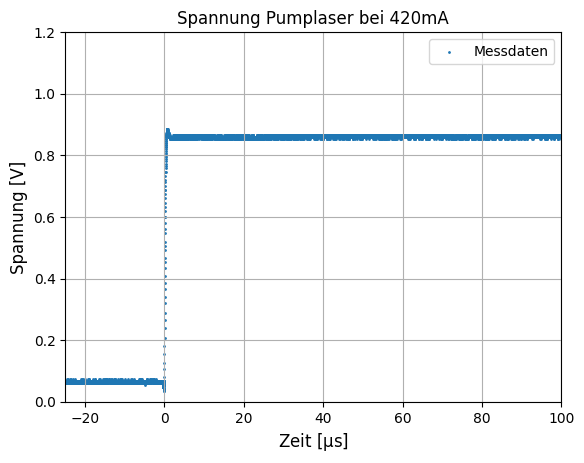

In [106]:
#plt.figure(figsize=(10,6))
plt.scatter(sg2c1[::40,0]*10**6,sg2c1[::40,1],label="Messdaten",s=1)
plt.axis([-25,100,0,1.2])
plt.xlabel(r"Zeit $[\mathrm{\mu s}]$",fontsize=12)
plt.ylabel("Spannung [V]",fontsize=12)
plt.title("Spannung Pumplaser bei 420mA",fontsize=12)
plt.legend(loc=1)
plt.grid(True)
plt.savefig("Plots/s2c1.pdf")
plt.show()

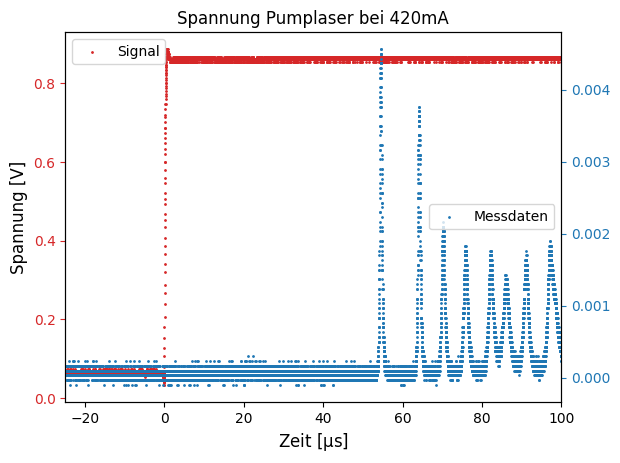

In [166]:
#plt.figure(figsize=(10,6))

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

ax1.scatter(sg2c1[::40,0]*10**6,sg2c1[::40,1],label="Signal",s=1,c="tab:red")
ax2.scatter(sg2c3[::40,0]*10**6,sg2c3[::40,1],label="Messdaten",s=1,c="tab:blue")
plt.xlim(-25,100)

ax1.tick_params(axis='y', colors='tab:red') 
ax2.tick_params(axis='y', colors='tab:blue') 

ax1.set_ylabel("Spannung [V]",fontsize=12)
#ax2.set_ylabel("Spannung [V]",fontsize=12,c="tab:blue")
plt.title("Spannung Pumplaser bei 420mA",fontsize=12)
ax1.legend(loc=2)
ax2.legend(loc=5)

ax1.set_xlabel(r"Zeit $[\mathrm{\mu s}]$",fontsize=12)

#plt.grid(True)
plt.savefig("Plots/s2all.pdf")
plt.show()

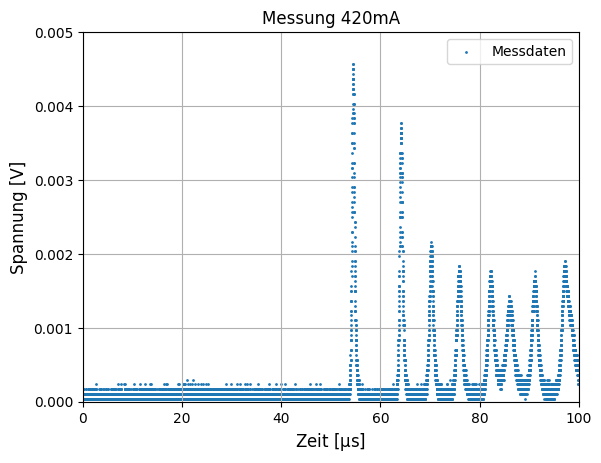

In [105]:
#plt.figure(figsize=(10,6))
plt.scatter(sg2c3[::40,0]*10**6,sg2c3[::40,1],label="Messdaten",s=1)
plt.axis([0,100,0,0.005])
plt.xlabel(r"Zeit $[\mathrm{\mu s}]$",fontsize=12)
plt.ylabel("Spannung [V]",fontsize=12)
plt.title("Messung 420mA",fontsize=12)
plt.legend(loc=1)
plt.grid(True)
plt.savefig("Plots/s2c3.pdf")
plt.show()

{'m': 0.2560712439065338, 'b': -11.783056098429547}
[0.00920322 2.97898963]


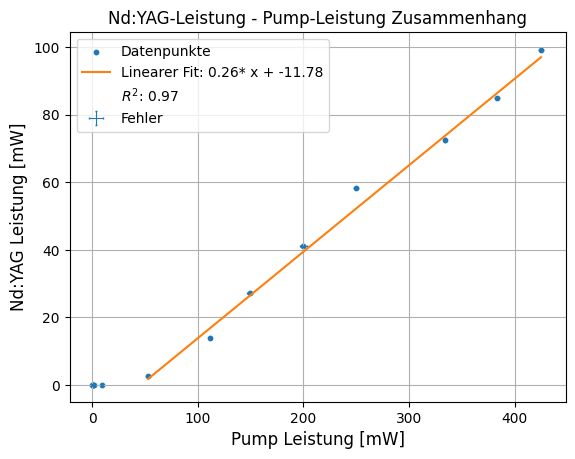

In [129]:
plt.errorbar(lpow2[:,1]*10,ndpower[:,1],linestyle="",capsize=1,elinewidth=0.8,xerr = lpow2[:,2]*10, yerr =ndpower[:,2], label="Fehler")
plt.scatter(lpow2[:,1]*10,ndpower[:,1],s=10,label="Datenpunkte")

lparam5 = lmodel.make_params(m = 0.25,b = -11)
lresult5 = lmodel.fit(ndpower[5:13,1],params=lparam5, x = lpow2[5:13,1]*10,weights = ndpower[5:13,2]*10)


plt.plot(lpow2[5:13,1]*10,lresult5.best_fit,label='Linearer Fit: '+str(np.round(lresult5.best_values["m"],2))+"* x + "+str(np.round(lresult5.best_values["b"],2)))
plt.plot([], [], ' ', label=r"$R^2$: "+str(np.round(lresult5.rsquared,2)))
plt.ylabel("Nd:YAG Leistung [mW]",fontsize=12)
plt.xlabel("Pump Leistung [mW]",fontsize=12)
plt.title("Nd:YAG-Leistung - Pump-Leistung Zusammenhang",fontsize=12)
plt.legend()
plt.grid(True)
plt.savefig("Plots/powerpower.pdf")
print(lresult5.best_values)
print(np.sqrt(np.diag(lresult5.covar)))

In [207]:
#Schwellpumpleistung 
Schwell = -lresult5.best_values["b"] / lresult5.best_values["m"]

u_SChell = np.sqrt(  lresult5.best_values["b"]/lresult5.best_values["m"]**2 * np.sqrt(np.diag(lresult5.covar))[0]**2 + (np.sqrt(np.diag(lresult5.covar))[1]*1/lresult5.best_values["m"])**2 )
print("Schwellpumpleistung: ", Schwell, u_SChell)
print("diff. Wirkungsgrad: ", lresult5.best_values["m"])
#Pumpwirkungsgrad
##zunächst das verhält nis der Wellenlängen berechnen 
NdYAG = 1064
DLaser = max_value
V = DLaser / NdYAG 

sigma = lresult5.best_values["m"]
u_sigma = np.sqrt(np.diag(lresult5.covar))[0]
eta = (sigma) * V 
#unsicherheit von eta 
u_eta = np.sqrt((V * u_sigma )**2 + (sigma / NdYAG * max_xerr)**2)
print("---------------------------------")
print("\eta = (", np.round(eta,3), "\pm", np.round(u_eta,3), ")" )
print("---------------------------------")

#optische Wirkungsgrad, d.h. das Verhältnis aus Ausgangsleistung zur optischen Pumpleistung

u_P_aus = np.sqrt(np.diag(lresult.covar))[1] #Unsicherheit der ausgangslei.: 
P_Pump= lpow2[12,1] *10 #Pumpleistung 
u_Pump = lpow2[12,2] *10  #Unsicherheit der Pumpleistung 

eta_opt = ndpower[12,1] / P_Pump

u_eta_opt = np.sqrt((u_Pump * ndpower[12,1]/P_Pump**2  )**2 + ( u_P_aus / P_Pump)**2 )
print("---------------------------------")
print(r"\eta_\text{opt} = (", np.round(eta_opt,3), "\pm", np.round(u_eta_opt,3), ")" )
print("---------------------------------")

#Gesamtewirkungsgrad 
I = 620.
U = 1.9 
P_ges = U * I 
u_I = 1 / (2 * np.sqrt(3))

eta_ges = ndpower[12,1] / P_ges 

u_eta_ges = np.sqrt((ndpower[12,1] / (U*I**2) * u_I)**2 + (u_P_aus / P_ges)**2)

print("---------------------------------")
print(r"\eta_\text{ges} = (", np.round(eta_ges,3), "\pm", np.round(u_eta_ges,3), ")" )
print("---------------------------------")


Schwellpumpleistung:  46.01475713817508 11.632786527331497
diff. Wirkungsgrad:  0.2560712439065338
---------------------------------
\eta = ( 0.195 \pm 0.007 )
---------------------------------
---------------------------------
\eta_\text{opt} = ( 0.233 \pm 0.006 )
---------------------------------
---------------------------------
\eta_\text{ges} = ( 0.084 \pm 0.002 )
---------------------------------
